# The Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Definition

The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform), as used in the following, is defined as

\begin{equation}
X(j \omega) = \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt
\end{equation}

where $X(j \omega) = \mathcal{F} \{ x(t) \}$ denotes the Fourier transform of $x(t)$. It is also termed as *spectrum* of the signal $x(t)$. The argument $j \omega$ copes for the fact that the kernel $e^{-j \omega t}$ of above [integral transform](https://en.wikipedia.org/wiki/Integral_transform) is a [harmonic exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $e^{s t}$ with $s= - j \omega$. Other common definitions of the Fourier transform may be found in the literature. They differ with respect to the sign of the exponential function and normalization factors. Or the Fourier transform is evaluated in terms of the frequency $f$ instead of the angular frequency $\omega = 2 \pi f$. In both cases, the properties, theorems and transforms may differ from the results given here.

A sufficient but not necessary condition for the existence of the Fourier transform of a given signal $x(t)$ is

\begin{equation}
\int_{-\infty}^{\infty} | x(t) | \; dt < \infty
\end{equation}

The signal $x(t)$ has to be an [absolutely integrable function](https://en.wikipedia.org/wiki/Absolutely_integrable_function). 

The inverse Fourier transform $x(t) = \mathcal{F}^{-1} \{ X(j \omega) \}$ is defined as

\begin{equation}
x(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \omega) \, e^{j \omega t} \; d\omega
\end{equation}

### Interpretation of the Spectrum

The Fourier transform is in general complex valued, $X(j \omega) \in \mathbb{C}$. It is commonly represented by its real and imaginary part $X(j \omega) = \Re \{ X(j \omega) \} + j \cdot \Im \{ X(j \omega) \}$ or by its magnitude and phase $X(j \omega) = |X(j \omega)| \cdot e^{j \varphi(j \omega)}$. It can be concluded from the inverse Fourier transformation that a signal $x(t)$ for which the Fourier transform $X(j \omega)$ exists can be represented as a superposition of weighted harmonic exponential signals $X(j \omega) \cdot e^{j \omega t}$. The magnitude spectra $|X(\omega)|$ provides insights into the composition of an unknown signal in terms of its harmonic contributions. The angular frequency of these contributions can be related to the frequency by $f = \frac{\omega}{2 \pi}$. Due to this reasoning, the Fourier transformation is a valuable tool in the analysis of signals.

In general a spectrum $X(j \omega)$ will also have non-negative contributions for negative angular frequencies $\omega < 0$. The concept of [negative frequencies](https://en.wikipedia.org/wiki/Negative_frequency) has no physical meaning. However, in the context of the Fourier transformation with its complex kernel $e^{j \omega t}$ it is required to express real-valued signals.

### Transformation of the Dirac Impulse

The transform $\mathcal{F} \{ \delta(t) \}$ of the [Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse) is derived by introducing $\delta(t)$ into the definition of the Fourier transform and exploiting the sifting property of the Dirac delta function

\begin{equation}
\mathcal{F} \{ \delta(t) \} = \int_{-\infty}^{\infty} \delta(t) \, e^{-j \omega t} dt = 1
\end{equation}

The transform of the Dirac impulse is equal to one. Hence, all angular frequencies $\omega$ are present with equal weight. This is an important property in the theory of signals and systems, since the Dirac impulse is used to characterize linear time-invariant (LTI) systems by its [impulse response](../systems_time_domain/impulse_response.ipynb) $h(t) = \mathcal{H} \{ \delta(t) \}$.

**Example**

The Fourier transform of the Dirac impulse can be derived in `SymPy` by direct evaluation of above integral

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, w = sym.symbols('t omega', real=True)

X = sym.integrate(sym.DiracDelta(t)*sym.exp(-sym.I*w*t), (t, -sym.oo, sym.oo))
X

`SymPy` offers also a [Fourier transform](http://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms.fourier_transform). However, it is defined in terms of the frequency $f$ instead of the angular frequency $\omega$. Therefore a custom function is defined which matches the definition used here

In [2]:
def fourier_transform(x, **hints):
    return sym.transforms._fourier_transform(x, t, w, 1, -1, 'Fourier')

Applying this function to the Dirac impulse yields the same result as the direct evaluation of the integral above

In [3]:
X = fourier_transform(sym.DiracDelta(t))
X

**Exercise**

* Derive the Fourier transform of a shifted Dirac impulse $\delta(t - \tau)$ either by manual evaluation of the integral or by modification of above examples.

### Transformation of the Rectangular Signal

The Fourier transform $\mathcal{F} \{ \text{rect}(t) \}$ of the [rectangular signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) is derived by explicit evaluation of its definition

\begin{equation}
\mathcal{F} \{ \text{rect}(t) \} = \int_{-\infty}^{\infty} \text{rect}(t) \, e^{-j \omega t} \; dt =
\int_{- \frac{1}{2}}^{\frac{1}{2}} e^{-j \omega t} \; dt = \frac{\sin(\frac{\omega}{2})}{\frac{\omega}{2}}
\end{equation}

The result is commonly abbreviated in terms of the [cardinal sine or sinc function](https://en.wikipedia.org/wiki/Sinc_function)

\begin{equation}
\text{sinc}(x) = \begin{cases} 
\frac{sin(x)}{x} & \text{for } x \neq 0 \\
1 & \text{for } x = 0
\end{cases}
\end{equation}

Note, that the value at $x = 0$ has been derived by applying [L'Hôpital's rule](https://en.wikipedia.org/wiki/L'H%C3%B4pital's_rule) to $\frac{sin(x)}{x}$. The sinc function is an important function in (digital) signal processing and communications engineering. It has the following properties

1. Its maximum value is one at $x=1$

2. It decays with $\frac{1}{x}$

3. Its zeros are located at $x_0 = n \cdot \pi$ for $n \in \mathcal{Z} \setminus \{0\}$

4. $\int_{-\infty}^{\infty} \text{sinc}(t) \; dt = \pi$

Using the sinc function, the Fourier transform of $\text{rect}(t)$ reads

\begin{equation}
\mathcal{F} \{ \text{rect}(t) \} = \text{sinc}\left( \frac{\omega}{2} \right)
\end{equation}

**Example**

The Fourier transform of the rectangular signal is computed in the following. First the rectangular signal is defined

In [4]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

Now the Fourier transform is computed

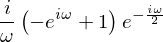

In [5]:
X = fourier_transform(rect(t))
X

The result is rewritten and simplified in order to yield the same result as above by manual evaluation of the integral

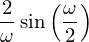

In [6]:
X = X.rewrite(sym.sin).simplify()
X

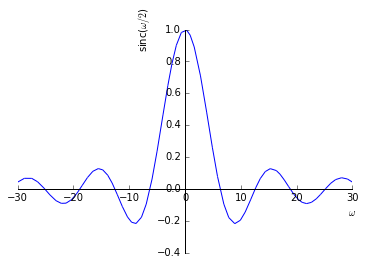

In [7]:
sym.plot(X, (w, -30, 30), xlabel=r'$\omega$', ylabel=r'sinc($\omega / 2$)');

**Exercise**

* Derive the Fourier transform of a scaled rectangular signal $\text{rect}(a t)$ with $a \in \mathbb{R}$ by manual evaluation of the Fourier integral or by modification of above example.
* What happens to the sinc function if you increase/decrease the width of the rectangular signal?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.